<a href="https://colab.research.google.com/github/gina168651-dot/ai_0915/blob/main/1110.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

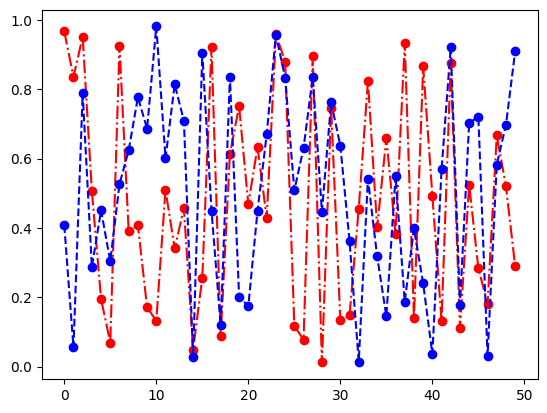

In [2]:
import matplotlib.pyplot as plt  # 引入 matplotlib.pyplot 套件，用於繪製圖表
import numpy as np  # 引入 numpy 套件，用於生成數學運算資料

np.random.seed(40)  # 設定隨機數據的種子為 40，以便每次生成相同的隨機數據
x = np.random.random(50)  # 生成一個包含 50 個隨機數字（範圍 0 到 1 之間）的 NumPy 陣列
x1 = np.random.random(50)  # 生成一個包含 50 個隨機數字（範圍 0 到 1 之間）的 NumPy 陣列
plt.plot(x1, "r-.o")  # 繪製圖表，'b--o' 表示藍色虛線，並用圓點標記每個資料點
plt.plot(x, "b--o")  # 繪製圖表，'b--o' 表示藍色虛線，並用圓點標記每個資料點
plt.show()  # 顯示圖表，這會打開一個圖形窗口來展示圖表


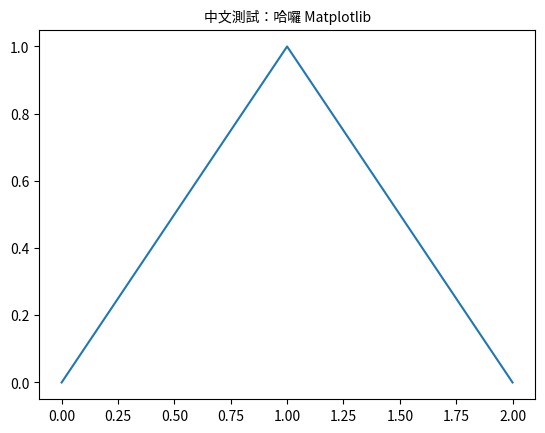

In [8]:
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm

# 告訴 Matplotlib 這個字型存在（不需要碰 cache）
fm.fontManager.addfont(font_path)
prop = fm.FontProperties(fname=font_path)

plt.rcParams['axes.unicode_minus'] = False  # 避免負號變成方塊

plt.title("中文測試：哈囉 Matplotlib", fontproperties=prop)
plt.plot([0,1,2], [0,1,0])
plt.show()



Saving 003.xlsx to 003 (3).xlsx


/tmp/ipython-input-4030900922.py:23: FutureWarning: The provided callable <function sum at 0x7c5b9055f100> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_multiple = mydata_pv.pivot_table(index=['產品'], values=['北區', '中區', '南區'], aggfunc=np.sum) # 根據 '產品' 欄位進行樞紐分析，並計算其他欄位的總和


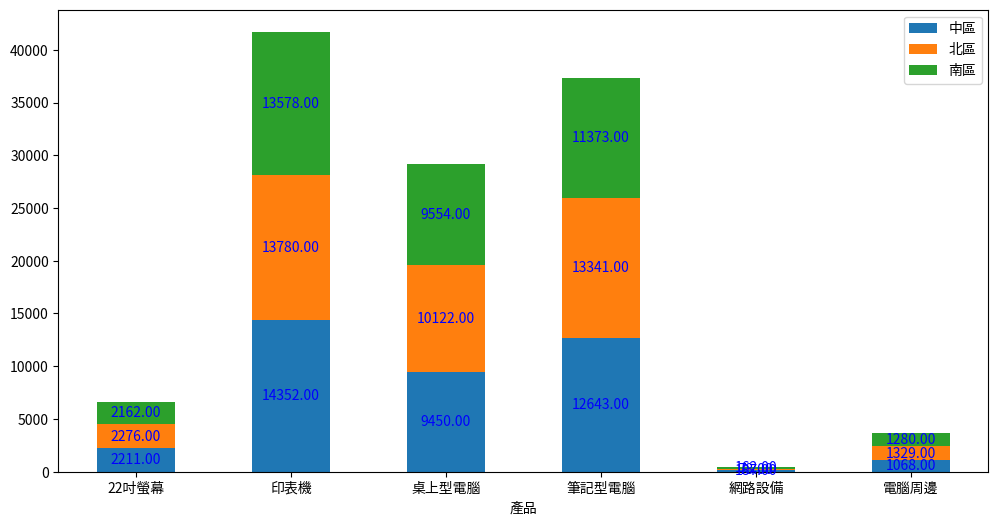

In [11]:
# ---- 必要匯入 ----------------------------------------------------------
import matplotlib as mpl      # 必須先 import 才能更改 rcParams
import matplotlib.pyplot as plt
import pandas as pd, numpy as np
from google.colab import files
import io

# ---- 指定中文字型 ------------------------------------------------------
mpl.rcParams["font.family"]    = ["Noto Sans CJK JP"]
mpl.rcParams["axes.unicode_minus"] = False  # 避免負號亂碼

uploaded = files.upload()
fname, content = next(iter(uploaded.items()))

# ---- 讀取資料 ----------------------------------------------------------
if fname.lower().endswith((".xls", ".xlsx")):
  df = pd.read_excel(io.BytesIO(content))
else:
  df = pd.read_csv(io.StringIO(content.decode("utf-8")), low_memory=False)

# ---- 透視表與繪圖 ------------------------------------------------------
mydata_pv = df[['產品', '北區', '中區', '南區']] # 選擇 '產品', '北區', '中區', '南區' 欄位
pivot_multiple = mydata_pv.pivot_table(index=['產品'], values=['北區', '中區', '南區'], aggfunc=np.sum) # 根據 '產品' 欄位進行樞紐分析，並計算其他欄位的總和
ax = pivot_multiple.plot(kind='bar', figsize=(12, 6), stacked=True) # 繪製堆疊柱狀圖

for container in ax.containers:
 ax.bar_label(container, fmt='%.2f', label_type='center', color='blue') # 為每個柱狀體添加資料標籤，並設定藍色文字
plt.xticks(rotation=0) # 設定 X 軸標籤水平顯示
plt.show() # 顯示圖形


Saving 003.xlsx to 003 (4).xlsx


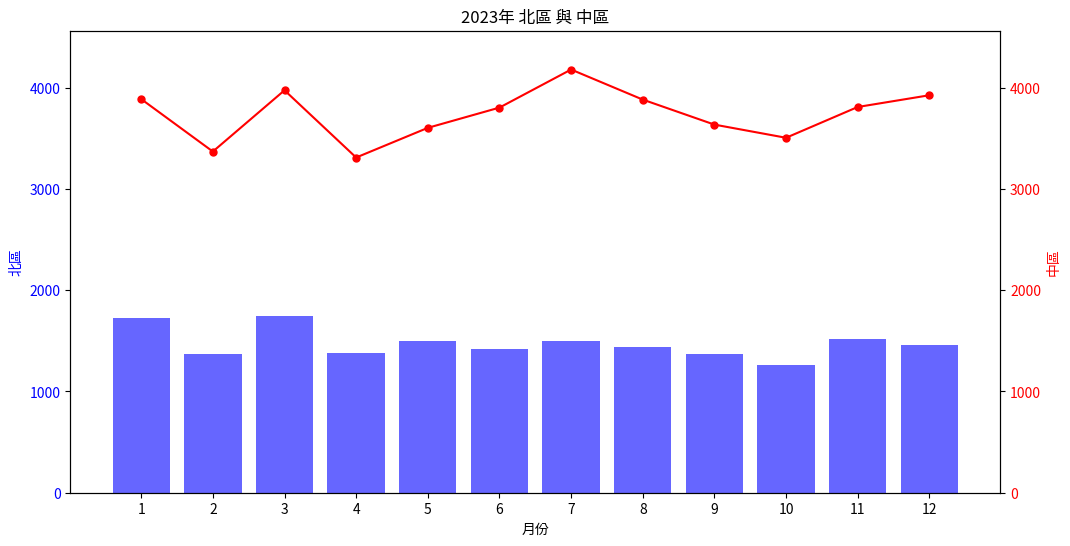

In [12]:
import matplotlib as mpl      # 必須先 import 才能更改 rcParams
import matplotlib.pyplot as plt
import pandas as pd, numpy as np
from google.colab import files
import io

# ---- 指定中文字型 ------------------------------------------------------
mpl.rcParams["font.family"]    = ["Noto Sans CJK JP"]
mpl.rcParams["axes.unicode_minus"] = False  # 避免負號亂碼

uploaded = files.upload()
fname, content = next(iter(uploaded.items()))

# ---- 讀取資料 ----------------------------------------------------------
if fname.lower().endswith((".xls", ".xlsx")):
  df = pd.read_excel(io.BytesIO(content))
else:
  df = pd.read_csv(io.StringIO(content.decode("utf-8")), low_memory=False)

mydata_pv = df[['產品', '北區', '中區', '南區']]
df['建檔日期'] = pd.to_datetime(df['建檔日期'])
df['年'] = df['建檔日期'].dt.year
df['月'] = df['建檔日期'].dt.month
df_filtered = df[df['年'] == 2023]
monthly_sum = df_filtered.groupby(['年', '月'])[['北區', '中區']].sum().reset_index()
max_production = monthly_sum['北區'].max()
max_defect_rate = monthly_sum['中區'].max()

y_max = max_production * 1.3 # 讓直條圖的最大值上方留出空間
y_min_offset = y_max + max_defect_rate * 1.2 # 確保折線圖不會與直條圖重疊
fig, ax1 = plt.subplots(figsize=(12, 6)) #  繪圖
ax1.set_ylim(0, y_min_offset) #  設定 y 軸範圍 (動態計算)
#  繪製直條圖 (北區)
ax1.bar(monthly_sum['月'], monthly_sum['北區'], color='blue', alpha=0.6, label="北區")
ax1.set_ylabel("北區", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(range(1, 13))
ax1.set_xlabel("月份")
#  繪製折線圖 (中區)
ax2 = ax1.twinx()
ax2.set_ylim(0, y_min_offset)
ax2.plot(monthly_sum['月'], monthly_sum['中區'] + y_max,
color='red', marker='o', markersize=5, linestyle='-', label="中區")
ax2.set_ylabel("中區", color='red')
ax2.tick_params(axis='y', labelcolor='red')
plt.title("2023年 北區 與 中區") #  設定標題
plt.show() #  顯示圖表


Saving 003.xlsx to 003 (5).xlsx


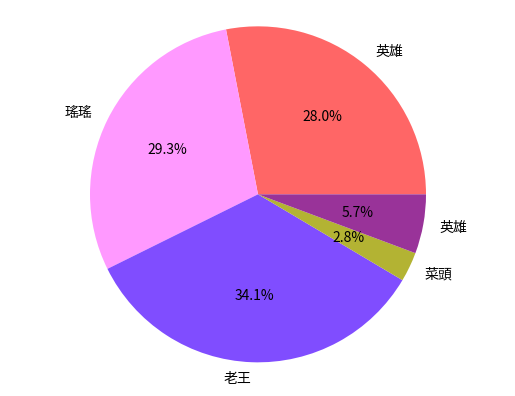

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd, numpy as np
from google.colab import files
import io
# ---- 指定中文字型 ------------------------------------------------------
mpl.rcParams["font.family"] = ["Noto Sans CJK JP"]
mpl.rcParams["axes.unicode_minus"] = False
uploaded = files.upload()
fname, content = next(iter(uploaded.items()))
# ---- 讀取資料 ----------------------------------------------------------
if fname.lower().endswith((".xls", ".xlsx")):
  df = pd.read_excel(io.BytesIO(content))
else:
  df = pd.read_csv(io.StringIO(content.decode("utf-8")), low_memory=False)
labels=df['業務'].head(5) # 取出 '業務' 欄位的前五個值作為標籤
size=df['北區'].head(5) # 取出 '北區' 欄位的前五個值作為圓餅圖數據
colors = [(1,.4,.4),(1,.6,1),(.5,.3,1),(.7,.7,.2),(.6,.2,.6)] # 定義每個區塊的顏色
plt.pie(size , labels = labels,colors=colors,autopct='%1.1f%%') # 繪製圓餅圖，顯示百分比
plt.axis('equal') # 設定圓餅圖的比例為正圓形
plt.show() # 顯示圓餅圖


Saving 003.xlsx to 003 (8).xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

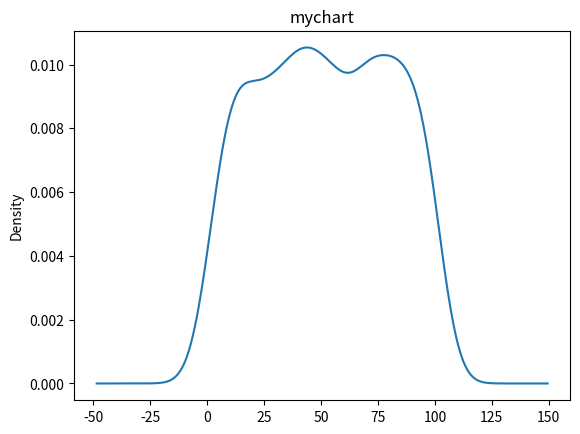

標準差 : 28.720040431188874


In [17]:
# 匯入必要的套件 -----------------------------------------------------------
import matplotlib as mpl                  # Matplotlib 主模組，用來設定繪圖的整體參數
import matplotlib.pyplot as plt           # Matplotlib 的 pyplot 模組，用於繪製圖表
import pandas as pd                       # Pandas，用於資料處理與讀取 Excel/CSV
import numpy as np                        # NumPy，用於數值運算（此處雖未直接使用，但常搭配 Pandas）
from google.colab import files            # Colab 的檔案上傳工具
import io                                 # io 模組，用來處理二進位與文字資料流

# ---- 指定中文字型 --------------------------------------------------------
mpl.rcParams["font.family"] = ["Noto Sans CJK JP"]
# 設定 Matplotlib 使用的字型為「Noto Sans CJK JP」，
# 這是前面安裝的 Google Noto 系列字型之一，可正確顯示中文、日文、韓文。

mpl.rcParams["axes.unicode_minus"] = False
# 設定圖表中負號「-」能正常顯示。
# 若不設這行，可能會出現「方框」或「亂碼」情況。

# ---- 上傳檔案 -----------------------------------------------------------
uploaded = files.upload()
# 開啟上傳介面，讓使用者從本機上傳一個檔案（例如 Excel 或 CSV）

fname, content = next(iter(uploaded.items()))
# 取得上傳的檔案名稱（fname）與內容（content）
# uploaded 是一個字典型態：{"檔名": 檔案內容}

# ---- 讀取資料 -----------------------------------------------------------
if fname.lower().endswith((".xls", ".xlsx")):
    df = pd.read_excel(io.BytesIO(content))
    # 若副檔名是 Excel，使用 pandas 的 read_excel() 讀取
    # io.BytesIO(content)：將二進位內容轉為記憶體中的檔案物件
else:
    df = pd.read_csv(io.StringIO(content.decode("utf-8")), low_memory=False)
    # 若是 CSV 檔案，則以 UTF-8 編碼讀取
    # io.StringIO()：把文字轉為可讀取的資料流
    # low_memory=False：確保 Pandas 在讀大檔案時正確推斷欄位型別

# ---- 繪圖 ---------------------------------------------------------------
mychart = df['北區']
# 從資料表中取出名為「北區」的欄位（Series）
# 假設此欄為數值資料，用來繪製分佈圖

mychart.plot(kind='kde', title='mychart')
# 使用核密度估計（Kernel Density Estimation, KDE）畫出分佈曲線
# kind='kde' 表示平滑分佈線，可視為直方圖的平滑版本
# title='mychart' 設定圖表標題
fig.savefig("11141203.jpg" , dpi=300, bbox_inches="tight")
files.download("11141203.jpg")


plt.show()
# 顯示圖表

# ---- 顯示統計值 --------------------------------------------------------
print('標準差 :', mychart.std())
# 計算並輸出「北區」欄位的標準差
